# Retail & Marketing Analytics 

### Individual Assignment - April 2024

#### Ana Rodrigo de Pablo - CID: 02490419

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

## Data exploration

In [308]:
df = pd.read_excel('juices_dataset.xlsx', sheet_name=1)
df.head()

,Week,Year,Total Units Sold,Recommended Retail Price,Actual Retail Price,Total Media Investment,Competitor 1 Price,Competitor 2 Price,Total Competitors Media
0,1,2019,887813.10,1.804241,1.593043,0.0,1.385262,1.088432,7.589648e+06
1,2,2019,896012.55,1.795083,1.561577,0.0,1.379264,1.088538,7.132373e+06
2,3,2019,948919.95,1.795199,1.538752,0.0,1.381455,1.090302,5.766690e+06
3,4,2019,1021518.00,1.795423,1.530314,0.0,1.394365,1.090307,3.773756e+06
4,5,2019,1022954.40,1.790171,1.527488,0.0,1.406322,1.092018,4.053209e+06


In [309]:
df['Total Units Sold'] = (df['Total Units Sold'].round()).astype(int)
df.iloc[:, 3] = df.iloc[:, 3].round(2)
df.iloc[:, 4] = df.iloc[:, 4].round(2)
df.iloc[:, 6] = df.iloc[:, 6].round(2)
df.iloc[:, 7] = df.iloc[:, 7].round(2)
df['Promotional Depth %'] = (((1-(df['Actual Retail Price']/df['Recommended Retail Price']))*100).round()).astype(int)

df.head()

,Week,Year,Total Units Sold,Recommended Retail Price,Actual Retail Price,Total Media Investment,Competitor 1 Price,Competitor 2 Price,Total Competitors Media,Promotional Depth %
0,1,2019,887813,1.80,1.59,0.0,1.39,1.09,7.589648e+06,12
1,2,2019,896013,1.80,1.56,0.0,1.38,1.09,7.132373e+06,13
2,3,2019,948920,1.80,1.54,0.0,1.38,1.09,5.766690e+06,14
3,4,2019,1021518,1.80,1.53,0.0,1.39,1.09,3.773756e+06,15
4,5,2019,1022954,1.79,1.53,0.0,1.41,1.09,4.053209e+06,15


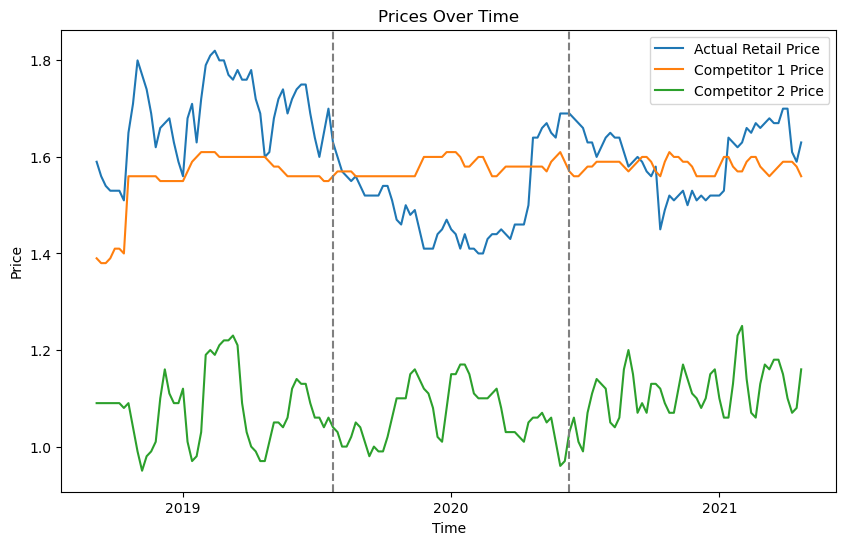

In [310]:
df['Week_Year'] = df['Week'].astype(str) + '-' + df['Year'].astype(str)
price_columns = ['Actual Retail Price', 'Competitor 1 Price', 'Competitor 2 Price']

# Plotting
plt.figure(figsize=(10, 6))
for column in price_columns:
    plt.plot(df['Week_Year'], df[column], label=column)

# Customize x-axis ticks to display only each year once
ticks = []
labels = []
last_year = None
for i, year_str in enumerate(df['Year']):
    year = int(year_str)
    if year != last_year and year != 2019:
        ticks.append(i)
        last_year = year

# Calculate positions for the three ticks
num_ticks = 3
tick_positions = [int(len(df) / (num_ticks + 1) * (i + 1)) for i in range(num_ticks)]
tick_labels = [2019, 2020, 2021]

# Adjust positions for the first and last tick
tick_positions[0] -= 20
tick_positions[2] += 20

# Add dashed lines separating each year
for tick in ticks:
    plt.axvline(x=tick, color='gray', linestyle='--')

# Set the ticks and labels
plt.xticks(tick_positions, tick_labels)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Prices Over Time')
plt.legend()
plt.grid(False)

plt.show()

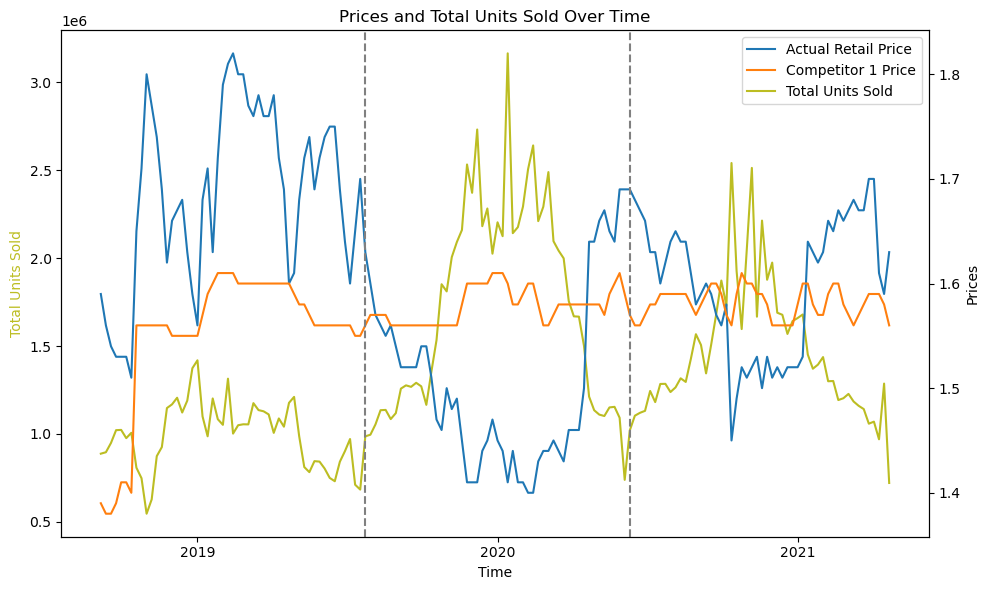

In [299]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Units Sold on primary y-axis
line1 = ax1.plot(df['Week_Year'], df['Total Units Sold'], label='Total Units Sold', color='#bcbd22')
ax1.set_xlabel('Time')
ax1.set_ylabel('Total Units Sold', color='#bcbd22')
ax1.tick_params(axis='y', labelcolor='black')

# Create a secondary y-axis for Promotional Depth %
ax2 = ax1.twinx()
line2 = ax2.plot(df['Week_Year'], df['Actual Retail Price'], label='Actual Retail Price', color='#1f77b4')
line3 = ax2.plot(df['Week_Year'], df['Competitor 1 Price'], label='Competitor 1 Price', color='#ff7f0e')
ax2.set_ylabel('Prices', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customize x-axis ticks to display only each year once
ticks = []
labels = []
last_year = None
for i, year_str in enumerate(df['Year']):
    year = int(year_str)
    if year != last_year and year != 2019:
        ticks.append(i)
        last_year = year

# Calculate positions for the three ticks
num_ticks = 3
tick_positions = [int(len(df) / (num_ticks + 1) * (i + 1)) for i in range(num_ticks)]
tick_labels = [2019, 2020, 2021]

# Adjust positions for the first and last tick
tick_positions[0] -= 20
tick_positions[2] += 20

# Add dashed lines separating each year
for tick in ticks:
    plt.axvline(x=tick, color='gray', linestyle='--')

# Set the ticks and labels
plt.xticks(tick_positions, tick_labels)

# Combine the lines for the legend
lines = line2 + line3 + line1
labels = [line.get_label() for line in lines]

# Display the legend
ax1.legend(lines, labels, loc='upper right')
plt.title('Prices and Total Units Sold Over Time')
fig.tight_layout()
plt.show()

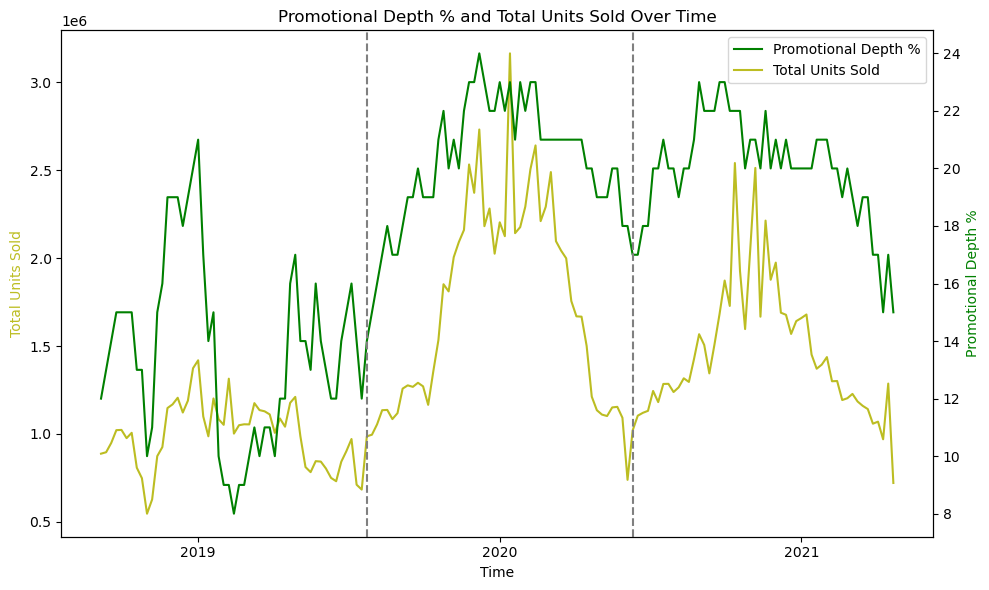

In [311]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Units Sold on primary y-axis
line1 = ax1.plot(df['Week_Year'], df['Total Units Sold'], label='Total Units Sold', color='#bcbd22')
ax1.set_xlabel('Time')
ax1.set_ylabel('Total Units Sold', color='#bcbd22')
ax1.tick_params(axis='y', labelcolor='black')

# Create a secondary y-axis for Promotional Depth %
ax2 = ax1.twinx()
line2 = ax2.plot(df['Week_Year'], df['Promotional Depth %'], label='Promotional Depth %', color='green')
ax2.set_ylabel('Promotional Depth %', color='green')
ax2.tick_params(axis='y', labelcolor='black')

# Customize x-axis ticks to display only each year once
ticks = []
labels = []
last_year = None
for i, year_str in enumerate(df['Year']):
    year = int(year_str)
    if year != last_year and year != 2019:
        ticks.append(i)
        last_year = year

# Calculate positions for the three ticks
num_ticks = 3
tick_positions = [int(len(df) / (num_ticks + 1) * (i + 1)) for i in range(num_ticks)]
tick_labels = [2019, 2020, 2021]

# Adjust positions for the first and last tick
tick_positions[0] -= 20
tick_positions[2] += 20

# Add dashed lines separating each year
for tick in ticks:
    plt.axvline(x=tick, color='gray', linestyle='--')

# Set the ticks and labels
plt.xticks(tick_positions, tick_labels)

# Combine the lines for the legend
lines = line2 + line1
labels = [line.get_label() for line in lines]

# Display the legend
ax1.legend(lines, labels, loc='upper right')
plt.title('Promotional Depth % and Total Units Sold Over Time')
fig.tight_layout()
plt.show()

## Regression Model and Price Elasticities

In [312]:
# Define features and target variable
X = df[['Actual Retail Price', 'Total Media Investment', 'Promotional Depth %', 
        'Competitor 1 Price', 'Competitor 2 Price', 'Total Competitors Media']]
y = df['Total Units Sold']

# Add a quadratic term for promotional depth
X['Promotional Depth % Squared'] = X['Promotional Depth %'] ** 2

# Reorder
X = X[['Actual Retail Price', 'Total Media Investment', 'Promotional Depth %', 'Promotional Depth % Squared',
       'Competitor 1 Price', 'Competitor 2 Price', 'Total Competitors Media']]

# Add a constant term to the features
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Units Sold   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     188.9
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.91e-70
Time:                        19:52:43   Log-Likelihood:                -2091.8
No. Observations:                 156   AIC:                             4200.
Df Residuals:                     148   BIC:                             4224.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [313]:
# Coefficients from the regression results
coef_promotional_depth = -3.18e+05
coef_promotional_depth_squared = 1.006e+04

# Compute the inflection point for Promotional Depth %
inflection_point = -coef_promotional_depth / (2 * coef_promotional_depth_squared)
print("Inflection point:", inflection_point)

# Only entries with promotional depth above inflection point
prom_depth_above_1581 = df[df['Promotional Depth %'] > inflection_point]

# Count the number of entries with promotional depth above 15.81
num_entries = len(prom_depth_above_1581)

print("Number of entries with promotional depth above 15.81:", num_entries)

Inflection point: 15.8051689860835
Number of entries with promotional depth above 15.81: 113


In [314]:
# Logarithmic transformation
df['log_Total_Units_Sold'] = np.log(df['Total Units Sold'])
df['log_Actual_Retail_Price'] = np.log(df['Actual Retail Price'])
df['log_Competitor_1_Price'] = np.log(df['Competitor 1 Price'])
df['log_Competitor_2_Price'] = np.log(df['Competitor 2 Price'])

# Create the model
model = sm.OLS.from_formula('log_Total_Units_Sold ~ log_Actual_Retail_Price + log_Competitor_1_Price + log_Competitor_2_Price', data=df)
result = model.fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     log_Total_Units_Sold   R-squared:                       0.854
Model:                              OLS   Adj. R-squared:                  0.851
Method:                   Least Squares   F-statistic:                     296.4
Date:                  Tue, 02 Apr 2024   Prob (F-statistic):           2.84e-63
Time:                          19:52:51   Log-Likelihood:                 94.708
No. Observations:                   156   AIC:                            -181.4
Df Residuals:                       152   BIC:                            -169.2
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

## Advertising Effectiveness Application

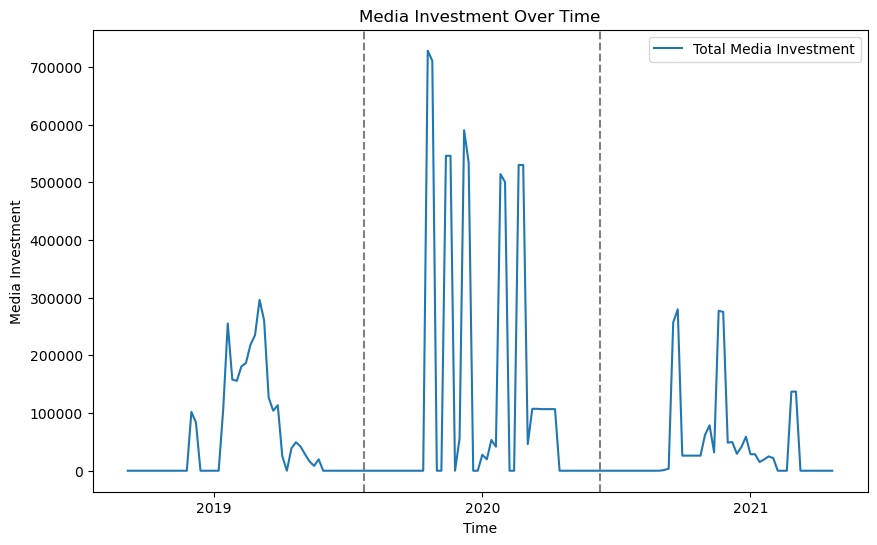

In [315]:
df['Week_Year'] = df['Week'].astype(str) + '-' + df['Year'].astype(str)
media_columns = ['Total Media Investment']

# Plotting
plt.figure(figsize=(10, 6))
for column in media_columns:
    plt.plot(df['Week_Year'], df[column], label=column)

# Customize x-axis ticks to display only each year once
ticks = []
labels = []
last_year = None
for i, year_str in enumerate(df['Year']):
    year = int(year_str)
    if year != last_year and year != 2019:
        ticks.append(i)
        last_year = year

# Calculate positions for the three ticks
num_ticks = 3
tick_positions = [int(len(df) / (num_ticks + 1) * (i + 1)) for i in range(num_ticks)]
tick_labels = [2019, 2020, 2021]

# Adjust positions for the first and last tick
tick_positions[0] -= 20
tick_positions[2] += 20

# Add dashed lines separating each year
for tick in ticks:
    plt.axvline(x=tick, color='gray', linestyle='--')

# Set the ticks and labels
plt.xticks(tick_positions, tick_labels)

plt.xlabel('Time')
plt.ylabel('Media Investment')
plt.title('Media Investment Over Time')
plt.legend()
plt.grid(False)
plt.show()

In [316]:
# Replace zero values with a very small positive number
df['Total Media Investment'].replace(0, 1e-10, inplace=True)

# Calculate delta (percentage change in ad)
df['delta'] = df['Total Media Investment'].pct_change()
df['delta'].iloc[0] = 0

# Calculate lagged sales
df['lagged_sales'] = df['Total Units Sold'].shift(1)
df['lagged_sales'].iloc[0] = 0

#Drop unnecessary columns
df.drop(['Week_Year', 'log_Total_Units_Sold', 'log_Actual_Retail_Price', 'log_Competitor_1_Price', 'log_Competitor_2_Price'], axis=1, inplace=True)

df.iloc[23:]

,Week,Year,Total Units Sold,Recommended Retail Price,Actual Retail Price,Total Media Investment,Competitor 1 Price,Competitor 2 Price,Total Competitors Media,Promotional Depth %,delta,lagged_sales
23,24,2019,1083941,1.92,1.72,1.580319e+05,1.61,1.03,4.347367e+06,10,-0.380953,1201870.0
24,25,2019,1051809,1.97,1.79,1.558306e+05,1.61,1.19,4.967094e+06,9,-0.013929,1083941.0
25,26,2019,1314198,1.98,1.81,1.808218e+05,1.61,1.20,1.241443e+06,9,0.160374,1051809.0
26,27,2019,1001923,1.98,1.82,1.867107e+05,1.61,1.19,4.326918e+06,8,0.032568,1314198.0
27,28,2019,1049728,1.98,1.80,2.184553e+05,1.60,1.21,5.281977e+06,9,0.170020,1001923.0
...,...,...,...,...,...,...,...,...,...,...,...,...
151,48,2021,1058335,2.05,1.70,1.000000e-10,1.59,1.15,1.987693e+05,17,0.000000,1141427.0
152,49,2021,1069908,2.05,1.70,1.000000e-10,1.59,1.10,4.840700e+04,17,0.000000,1058335.0
153,50,2021,969548,1.90,1.61,1.000000e-10,1.59,1.07,1.973688e+06,15,0.000000,1069908.0
154,51,2021,1286395,1.91,1.59,1.000000e-10,1.58,1.08,3.167700e+04,17,0.000000,969548.0


In [317]:
def new_model(x, sales, advertising, delta, lagged_sales):
    a = x[0]
    lambda_val = x[1]
    b = x[2]
    c = x[3]
    forecast = np.zeros(len(lagged_sales))
    for i in range(1, len(lagged_sales)):
        forecast[i] = a + lambda_val * lagged_sales[i] + b * np.log(advertising[i]) + c * max(0, delta[i])
    se = (sales - forecast) ** 2
    sse = np.sum(se[1:])
    return sse

# Define the parameters
x = [1, 1, 1, 1]
sales = df['Total Units Sold'].values
advertising = df['Total Media Investment'].values
delta = df['delta'].values
lagged_sales = df['lagged_sales'].values

# Define the objective function to minimize
objective_function = lambda x: new_model(x, sales, advertising, delta, lagged_sales)

# Perform optimization to find the optimal parameters
initial_guess = [1, 1, 1, 1]
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

# Get the optimal parameters
optimal_params = result.x

# Apply the function
sse = new_model(x, sales, advertising, delta, lagged_sales)
print("Sum of Squared Errors (SSE):", sse)
# Display the results
print("Optimal parameters:", optimal_params)

Sum of Squared Errors (SSE): 1.155350999630435e+32
Optimal parameters: [ 1.19295168e+00  9.87387148e-01  1.44512475e+00 -1.23612431e-12]
